Name: Muley, Tushar

Assignment: Week 5 & 6 Exercises

Date: January 24, 2021


# Exercise 1: Data Wrangling with Python: Activity 7, page 207

1. Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

In [21]:
#Import libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd

2. Read the page using bs4

In [22]:
#Variable for URL
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

get_html = requests.get(url).text #Make the request to get data

soup = BeautifulSoup(get_html) #Prase the data
print(soup.prettify()) #Print the data


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YAWY-QpAMNAAAqi5cqoAAADR","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":1000963126,"wgRevisionId":1000963126,"wgArticleId":380845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using the EasyTimeline extension","Wikipedia indefinitely semi-protected pages","Articles wit

In [23]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


3. Find the table structure you will need to deal with (how many tables there are?)

In [24]:
#Find the number of tables using find_all
no_tables = soup.find_all('table')
#Print what was found
print('Total number of tables:',len(no_tables))

Total number of tables: 10


4. Find the right table using bs4

In [25]:
#Using the class
tables = soup.find('table', attrs={'class': 'wikitable'})
tables_data = tables.tbody.find_all('tr')

# Get table headings
headings = []
for td in tables_data[0].find_all('td'):
    # Remove any newlines and extra spaces
    headings.append(td.b.text.replace('\n', ' ').strip())

print('The number of needed tables:',len(headings)) #Print the number needed tables

The number of needed tables: 3


In [34]:
print(headings)

['Per the International Monetary Fund (2020 estimates)', 'Per the World Bank (2019)', 'Per the United Nations (2019)']


5. Separate the source names and their corresponding data

In [27]:
#Separate the source from the data
tbl_sor = tables.tbody.find_all('tr')[0]
sor_data = [td for td in tbl_sor.find_all('td')]

print('Source data:',len(sor_data))


Source data: 3


6. Get the source names from the list of sources you have created

In [28]:
sor_nm = [tbl_sor.find_all('a')[0].get_text() for tbl_sor in sor_data]
print('The sources of the tables:',sor_nm)

The sources of the tables: ['International Monetary Fund', 'World Bank', 'United Nations']


7. Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that

In [29]:
col = []
for th in tables.find_all('th'):
    col.append(th.text.replace('\n',' ').strip())

col


['Rank',
 'Country/Territory',
 'GDP(US$million)',
 'Rank',
 'Country/Territory',
 'GDP(US$million)',
 'Rank',
 'Country/Territory',
 'GDP(US$million)']

In [53]:
data = {}
for table, heading in zip(tables_data[1].find_all("table"), headings):
    # Get headers of table i.e., Rank, Country, GDP.
    t_headers = []
    for th in tables.find_all("th"):
        # remove any newlines and extra spaces from left and right
        t_headers.append(th.text.replace('\n', ' ').strip())
    # Get all the rows of table
    t_data = []
    for tr in table.tbody.find_all("tr"): # find all tr's from table's tbody
        t_row = {}
        # Each table row is stored in the form of
        # t_row = {'Rank': '', 'Country/Territory': '', 'GDP(US$million)': ''}

        # find all td's(3) in tr and zip it with t_header
        for td, th in zip(tr.find_all("td"), t_headers): 
            t_row[th] = td.text.replace('\n', '').strip()
        t_data.append(t_row)

    # Put the data for the table with his heading.
    data[heading] = t_data

print(data)

{'Per the International Monetary Fund (2020 estimates)': [{}, {'Rank': '', 'Country/Territory': 'World[19]', 'GDP(US$million)': '83,844,988'}, {'Rank': '1', 'Country/Territory': 'United States', 'GDP(US$million)': '20,807,269'}, {'Rank': '2', 'Country/Territory': 'China[n 2][n 3]', 'GDP(US$million)': '14,860,775'}, {'Rank': '3', 'Country/Territory': 'Japan', 'GDP(US$million)': '4,910,580'}, {'Rank': '4', 'Country/Territory': 'Germany', 'GDP(US$million)': '3,780,553'}, {'Rank': '5', 'Country/Territory': 'United Kingdom', 'GDP(US$million)': '2,638,296'}, {'Rank': '6', 'Country/Territory': 'India', 'GDP(US$million)': '2,592,583'}, {'Rank': '7', 'Country/Territory': 'France', 'GDP(US$million)': '2,551,451'}, {'Rank': '8', 'Country/Territory': 'Italy', 'GDP(US$million)': '1,848,222'}, {'Rank': '9', 'Country/Territory': 'Canada', 'GDP(US$million)': '1,600,264'}, {'Rank': '10', 'Country/Territory': 'South Korea', 'GDP(US$million)': '1,586,786'}, {'Rank': '11', 'Country/Territory': 'Russia[n 4

In [65]:
#First data source 
df = pd.DataFrame(data[headings[0]][2:])
print('Per the International Monetary Fund (2020 estimates)')
df

Per the International Monetary Fund (2020 estimates)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,"20,807,269"
1,2,China[n 2][n 3],"14,860,775"
2,3,Japan,"4,910,580"
3,4,Germany,"3,780,553"
4,5,United Kingdom,"2,638,296"
...,...,...,...
190,191,Marshall Islands,225
191,192,Kiribati,194
192,193,Nauru,114
193,194,Tuvalu,45


8. Repeat the last task for the other two data sources

In [67]:
#Second data source Per the World Bank (2019)
df = pd.DataFrame(data[headings[1]][2:])
print('Per the World Bank (2019)')
df

Per the World Bank (2019)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,"21,427,700"
1,2,China[n 9],"14,342,903"
2,3,Japan,"5,081,770"
3,4,Germany,"3,845,630"
4,5,India,"2,875,142"
...,...,...,...
185,188,Palau (2018),284
186,189,Marshall Islands (2018),221
187,190,Kiribati,195
188,191,Nauru,118


In [69]:
#Third data source Per the United Nations (2019)
df = pd.DataFrame(data[headings[2]][2:])
print('Per the United Nations (2019)')
df

Per the United Nations (2019)


,Rank,Country/Territory,GDP(US$million)
0,1,United States,"21,433,226"
1,2,China[n 9],"14,342,933"
2,3,Japan,"5,082,465"
3,4,Germany,"3,861,123"
4,5,India,"2,891,582"
...,...,...,...
207,209,Marshall Islands,237
208,210,Kiribati,194
209,211,Nauru,132
210,212,Montserrat (United Kingdom),67


# Exercise 2: Data Wrangling with Python: Activity 8, page 233

1.Read the visit_data.csv file.

In [46]:
import pandas as pd
import scipy as sp
import numpy as np

In [3]:
#Varaible set to csv file and dataframe to load the csv content to.
file_nm = 'visit_data.csv'
df = pd.read_csv(file_nm)

In [4]:
#Import sys to check where my install of anaconda is to load of other packages.
import sys
{sys.executable}

{'C:\\Users\\Tushar\\anaconda3\\python.exe'}

In [5]:
#Check the output of dataframe
df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


2.Check for duplicates.

In [16]:
print('Column first_name has duplicates? {}'.format(any(df.first_name.duplicated())))
print('Column last_name has duplicates? {}'.format(any(df.last_name.duplicated())))
print('Column email has duplicates? {}'.format(any(df.email.duplicated())))
#Gender being a distinctive attritbute is assumed to have duplicates.
print('Column ip_address has duplicates? {}'.format(any(df.ip_address.duplicated())))
print('Column visit has duplicates? {}'.format(any(df.visit.duplicated())))

Column first_name has duplicates? True
Column last_name has duplicates? True
Column email has duplicates? False
Column ip_address has duplicates? False
Column visit has duplicates? True


3.Check if any essential column contains NaN.

In [18]:
#Check output of dataframe
df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [28]:
#Check columns for NaN values

print('Column first_name contains NaN? - %s '% df.first_name.isnull().values.any())
print('Column last_name contains NaN? - %s ' % df.last_name.isnull().values.any())
print('Column email contains NaN? - %r ' % df.email.isnull().values.any())
print('Column gender contains NaN? - %s ' % df.gender.isnull().values.any())
print('Column ip_address contains NaN? - %s ' % df.ip_address.isnull().values.any())
print('Column visit contains NaN? - %s ' % df.visit.isnull().values.any())

Column first_name contains NaN? - True 
Column last_name contains NaN? - True 
Column email contains NaN? - False 
Column gender contains NaN? - True 
Column ip_address contains NaN? - False 
Column visit contains NaN? - True 


4.Get rid of the outliers.

In [30]:
#Making a copy of the original df as original_df
original_df = df
#Confirm we have data
original_df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [33]:
#Import matplotlib for a quick plot of data.
import matplotlib.pyplot as plt

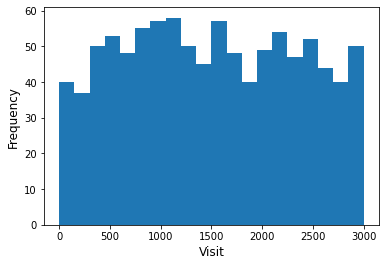

In [35]:
#Quick plot to see what is in the data
plt.hist(df['visit'],bins=20) #Type of plot and bin setting
plt.xlabel('Visit',fontsize=12) #Label of X axis
plt.ylabel('Frequency',fontsize=12) #Label of Y axis
plt.show() #Show plot

C:\Users\Tushar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Tushar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Tushar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Tushar\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f1beef70>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f1c3abb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f1c3a2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f1c482b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f1c485b0>],
 'means': []}

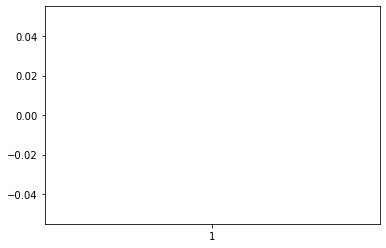

In [67]:
#Box plot using matplotlib
plt.boxplot(df.visit)

In [51]:
#Import stats from scipy library
from scipy import stats

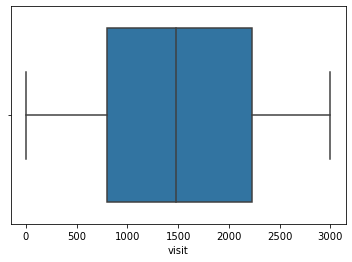

In [60]:
#Box plot using seaborn
import seaborn as sns
sns.boxplot(x=df.visit)

In [55]:
#Check zscore on visit
z = np.abs(stats.zscore(df.visit))
print(z)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [56]:
df = df[np.isfinite(df.visit)]

In [59]:
#Check to see if 'nan' values removed.
print('Column visit contains NaN? - %s ' % df.visit.isnull().values.any())

Column visit contains NaN? - False 


In [58]:
#Recheck to see if 'nan' were removed.
z = np.abs(stats.zscore(df.visit))
print(z)

[0.3255421  0.69046701 1.46324917 0.59148411 1.11626906 1.24858746
 0.05011589 1.14602687 0.90035846 0.01076125 0.6976224  1.63497854
 0.9981488  0.44008467 0.49971292 0.1991302  0.6737711  1.42508709
 1.27005363 0.8204566  1.76979472 0.15267649 1.17351219 1.69579936
 0.59029155 1.76263933 0.94209824 1.261762   1.20332631 0.479383
 1.74236572 0.50919712 1.39646553 1.00178282 0.16931608 1.35949601
 1.2438172  0.09656961 0.57961478 0.87417835 0.83124601 0.80739471
 0.83243858 1.47875252 0.85265586 1.04346627 0.62129824 1.6910291
 1.7661607  0.03097853 0.0226869  1.06618133 1.64219026 1.4322988
 1.234333   1.25460661 1.64219026 0.02501571 1.69466312 0.2683553
 1.4215094  0.70721924 1.06260363 0.95998672 0.68933077 0.12161348
 1.31781256 0.16454582 0.10616645 0.33633151 0.29339917 0.90876274
 0.76917631 1.0220001  1.35114806 0.43531441 1.12580958 1.69222167
 0.72272259 0.99343486 0.68933077 0.28022463 0.96117928 0.23967742
 1.09832426 0.28022463 1.59687278 0.4281027  1.70533988 0.23371459


5.Report the size difference.

In [57]:
#Original dataframe size
print('Original dataframe size:',original_df.shape)

#New dataframe size
print('New dataframe size:',df.shape)

Original dataframe size: (1000, 7)
New dataframe size: (974, 7)


The isfinite function removed 'nan' values. Reducing the size of the original df from 1,000 to 974

6.Create a box plot to check for outliers.

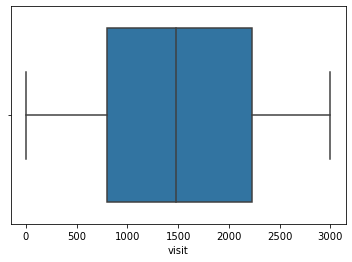

In [62]:
#Create another boxplot to check for outliers
sns.boxplot(x=df.visit)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d1f1d15250>,
 'caps': [<matplotlib.lines.Line2D at 0x1d1f1d15910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d1f1d06eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d1f1d15fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d1f1d1d310>],
 'means': []}

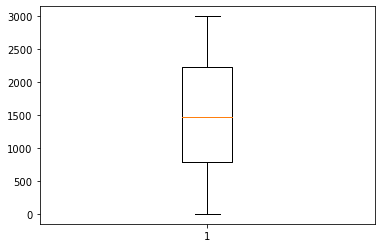

In [68]:
#Create another box plot using plotly
plt.boxplot(df.visit)

7.Get rid of any outliers.

In [76]:
#Remove range of data since they are considered outliers
df2 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]

In [77]:
#Check the shape of the data
df2.shape

(923, 7)

# Exercise 3: Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

1. Insert data into a SQL Lite database Name, Address, City, State, Zip, Phone Number

In [19]:
#Import libraries
import sqlite3
import pandas as pd

In [7]:
#Set variable query and code to create table with column names and defined type.
query = """
   .....: CREATE TABLE tbl_address
   .....: (name VARCHAR(100), adress VARCHAR(100), city VARCHAR(100), state VARCHAR(3), zip VARCHAR(11),
   .....:  phone_no INTEGER);"""

In [5]:
#Command to create connection to SQLite
con = sqlite3.connect('mydata.sqlite')

In [8]:
#Command to execute with variable query to the table creation and columns names.
con.execute(query)

In [9]:
#Command to commit the new table.
con.commit()

In [10]:
#Insert variable for inserting records into table tbl_address.
stmt = "INSERT INTO tbl_address VALUES(?, ?, ?, ?, ?, ?)"

In [12]:
#Data that is being inserted into tbl_address
data = [('TJ HUNT','13859 Carmel Ridge Rd','San Diego','CA','92128',7745489999),
.....:('SIMON DREVENCHUK','712 Schmitt Rd','Rossville','TN','38066',4235050188),
.....:('JAMES SMITH','4578 E. El Camino Way','Sacramento','CA',90243,5557889910),
.....:('JOHNJAY RICH','123 E. Made Up Blvd','Unwhereville','FL',17878,3217755678),
.....:('JONNY KNOX','788 W. Route 66','Indian Wells','AZ',85578,5205247878),
.....:('THOMAS MAGNUM','41-505 Kalanianaole Highway','Oahu','HI',96815,8085551478),
.....:('CHRIS JONES','2229 Coast Hwy','San Clemente','CA',92675,9494924992),
.....:('MARTY DEEKS','1894 Parkson Ave.','Sand City','CA',93955,8315557845),
.....:('TONY STARKS','200 Park Ave','New York','NY',10001,6781367092),
.....:('ROGER RABBIT','1313 Disneyland Dr','Toontown','CA',92802,1234567890)]

In [13]:
#Command to execute insert statement and data into table tbl_address
con.executemany(stmt, data)

In [14]:
#Command to commit the data to the table.
con.commit()

In [15]:
#Import sqlalchemy to read data from table tbl_address 
import sqlalchemy as sqla

In [16]:
#Set variable db to create the sqlite engine
db = sqla.create_engine('sqlite:///mydata.sqlite')

In [20]:
#Read the data using read_sql from table tbl_address
pd.read_sql('select * from tbl_address', db)

,name,adress,city,state,zip,phone_no
0,TJ HUNT,13859 Carmel Ridge Rd,San Diego,CA,92128,7745489999
1,SIMON DREVENCHUK,712 Schmitt Rd,Rossville,TN,38066,4235050188
2,JAMES SMITH,4578 E. El Camino Way,Sacramento,CA,90243,5557889910
3,JOHNJAY RICH,123 E. Made Up Blvd,Unwhereville,FL,17878,3217755678
4,JONNY KNOX,788 W. Route 66,Indian Wells,AZ,85578,5205247878
5,THOMAS MAGNUM,41-505 Kalanianaole Highway,Oahu,HI,96815,8085551478
6,CHRIS JONES,2229 Coast Hwy,San Clemente,CA,92675,9494924992
7,MARTY DEEKS,1894 Parkson Ave.,Sand City,CA,93955,8315557845
8,TONY STARKS,200 Park Ave,New York,NY,10001,6781367092
9,ROGER RABBIT,1313 Disneyland Dr,Toontown,CA,92802,1234567890
